# Preparation

## Preparing data files

In [ ]:
!rm -rf /content/graph-edge-anomaly-detection
!git clone https://github.com/MKasaei00/graph-edge-anomaly-detection.git

Cloning into 'graph-edge-anomaly-detection'...
remote: Enumerating objects: 356, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 356 (delta 14), reused 20 (delta 10), pack-reused 323 (from 4)
Receiving objects: 100% (356/356), 204.43 MiB | 16.91 MiB/s, done.
Resolving deltas: 100% (160/160), done.
Updating files: 100% (78/78), done.


In [ ]:
!sudo apt-get install unrar  # Install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!pwd

/content


In [ ]:
!rm -rf /content/merged_data
!mkdir /content/merged_data/
!mkdir /content/merged_data/DARPA
!mkdir /content/merged_data/ISCX
!mkdir /content/merged_data/IDS2018
!mkdir /content/merged_data/DDOS2019

In [ ]:
!unrar x /content/graph-edge-anomaly-detection/datasets/DARPA/meta.rar /content/merged_data/DARPA
!unrar x /content/graph-edge-anomaly-detection/datasets/ISCX/meta.rar /content/merged_data/ISCX
!unzip /content/graph-edge-anomaly-detection/datasets/IDS2018/merged_data.zip -d /content/merged_data/IDS2018/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/graph-edge-anomaly-detection/datasets/DARPA/meta.rar

Extracting  /content/merged_data/DARPA/merged_data.csv                    21% 42% 63% 85%100%  OK 
All OK

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/graph-edge-anomaly-detection/datasets/ISCX/meta.rar

Extracting  /content/merged_data/ISCX/merged_data.csv                     72%100%  OK 
All OK
Archive:  /content/graph-edge-anomaly-detection/datasets/IDS2018/merged_data.zip
  inflating: /content/merged_data/IDS2018/merged_data.csv  


In [ ]:
!unzip /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.zip -d /content/merged_data/DDOS2019/

Archive:  /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.zip
warning [/content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.zip]:  zipfile claims to be last disk of a multi-part archive;
  attempting to process anyway, assuming all parts have been concatenated
  together in order.  Expect "errors" and warnings...true multi-part support
  doesn't exist yet (coming soon).
file #1:  bad zipfile offset (local header sig):  4


In [ ]:
!unzip /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.zip -d /content/merged_data/DDOS2019/

Archive:  /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.zip
warning [/content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.zip]:  zipfile claims to be last disk of a multi-part archive;
  attempting to process anyway, assuming all parts have been concatenated
  together in order.  Expect "errors" and warnings...true multi-part support
  doesn't exist yet (coming soon).
file #1:  bad zipfile offset (local header sig):  4


In [ ]:
# prompt: I have a 3 part zip file with these paths
# /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.z01
# /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.z02
# /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.zip
# how to concatenate all the files so the zip can do the job

!cat /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.z01 /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.z02 /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data.zip > /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data_full.zip
!unzip /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data_full.zip -d /content/merged_data/DDOS2019/

Archive:  /content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data_full.zip
warning [/content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data_full.zip]:  zipfile claims to be last disk of a multi-part archive;
  attempting to process anyway, assuming all parts have been concatenated
  together in order.  Expect "errors" and warnings...true multi-part support
  doesn't exist yet (coming soon).
warning [/content/graph-edge-anomaly-detection/datasets/DDOS2019/merged_data_full.zip]:  104857600 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  104857604
  (attempting to re-compensate)
  inflating: /content/merged_data/DDOS2019/merged_data.csv  


## Preparing data frames

In [ ]:
import pandas as pd

In [ ]:
DARPA_df = pd.read_csv('/content/merged_data/DARPA/merged_data.csv')
DARPA_df

,score,label,min,q1,median,q3,max,sum
0,1.0000,0,0,0,0,0,1,2
1,2.0000,0,0,0,0,0,2,4
2,1.0000,0,0,0,0,0,1,5
3,2.0000,0,0,0,0,0,2,7
4,1.0000,0,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...
4554339,140.1304,0,0,0,0,0,201,807
4554340,140.8375,0,0,0,0,0,201,809
4554341,141.5446,0,0,0,0,0,201,811
4554342,142.2517,0,0,0,0,0,201,813


In [ ]:
ISCX_df = pd.read_csv('/content/merged_data/ISCX/merged_data.csv')
ISCX_df

,score,label,min,q1,median,q3,max,sum
0,1.0000,1,0,0,0,0,1,1
1,1.0000,0,0,0,0,0,1,1
2,1.0000,0,0,0,0,0,1,2
3,1.2226,0,0,0,0,0,1,3
4,1.5756,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...
1097065,6.5115,0,0,0,0,0,6,17
1097066,6.8603,0,0,0,0,0,6,16
1097067,7.1743,0,0,0,0,0,7,16
1097068,7.4569,0,0,0,0,0,7,15


In [ ]:
IDS2018_df = pd.read_csv('/content/merged_data/IDS2018/merged_data.csv')
IDS2018_df

,score,label,min,q1,median,q3,max,sum
0,1.0000,0,0,0,0.000000,0.000000,1.000,1.0
1,1.0000,0,0,0,0.000000,0.000000,1.000,2.0
2,1.4142,0,0,0,0.000000,0.000000,1.000,3.0
3,1.6330,0,0,0,0.000000,0.000000,1.000,4.0
4,1.0000,0,0,0,0.000000,0.000000,1.000,5.0
...,...,...,...,...,...,...,...,...
7948743,130.8491,0,0,0,0.006417,0.667852,161.337,1505.2
7948744,92.8800,0,0,0,0.006417,0.667852,161.337,1506.2
7948745,92.5511,0,0,0,0.006417,0.670353,161.337,1507.2
7948746,123.7822,0,0,0,0.006417,0.670353,161.337,1508.2


In [ ]:
DDOS2019_df = pd.read_csv('/content/merged_data/DDOS2019/merged_data.csv')
DDOS2019_df

,score,label,min,q1,median,q3,max,sum
0,1.0000,0,0,0,0,0,1.00000,1.0000
1,1.0000,0,0,0,0,0,1.00000,1.9000
2,1.3435,0,0,0,0,0,1.00000,2.9000
3,1.4142,0,0,0,0,0,1.00000,3.9000
4,2.1213,0,0,0,0,0,2.00000,4.9000
...,...,...,...,...,...,...,...,...
20364520,1.3935,1,0,0,0,0,5.38240,14.6135
20364521,5.8442,1,0,0,0,0,5.84416,14.1522
20364522,1.1977,0,0,0,0,0,5.25974,13.7370
20364523,1.8491,0,0,0,0,0,4.73377,13.3633


# Analysis

## Static analysis

### Calculate Static threshold for datasets that Maximize F1 measure

In [ ]:
# prompt: Get the start range and end range as default values
# if not passed to the function get max and min
# if passed keep that values

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

def get_threshold_range(df, score_column='score', start_range=None, end_range=None):
  """
  Gets the start and end range for thresholds.
s
  Args:
      df (pd.DataFrame): The input dataframe.
      score_column (str): The name of the column containing anomaly scores.
      start_range (float, optional): The starting threshold. Defaults to min score.
      end_range (float, optional): The ending threshold. Defaults to max score.

  Returns:
      tuple: A tuple containing the start and end range.
  """
  min_score = df[score_column].min()
  max_score = df[score_column].max()

  start_range = start_range if start_range is not None else min_score
  end_range = end_range if end_range is not None else max_score

  return start_range, end_range

# Example usage within the plot_precision_recall_f1 function:
def plot_precision_recall_f1(df, score_column='score', label_column='label', num_points=20, start_range=None, end_range=None):
    """
    Draws a diagram showing Precision, Recall, and F1 score for different thresholds.

    Args:
        df (pd.DataFrame): The input dataframe.
        score_column (str): The name of the column containing anomaly scores.
        label_column (str): The name of the column containing true labels (0 or 1).
        num_points (int): The number of threshold points to sample.
        start_range (float, optional): The starting threshold. Defaults to min score.
        end_range (float, optional): The ending threshold. Defaults to max score.
    """
    start, end = get_threshold_range(df, score_column, start_range, end_range)

    # Generate a set of thresholds by sampling evenly across the specified range
    thresholds = np.linspace(start, end, num_points)

    precision_list = []
    recall_list = []
    f1_list = []

    for threshold in thresholds:
        predicted_labels = (df[score_column] > threshold).astype(int)

        # Calculate metrics, handling potential zero division
        precision = precision_score(df[label_column], predicted_labels, zero_division=0)
        recall = recall_score(df[label_column], predicted_labels, zero_division=0)
        f1 = f1_score(df[label_column], predicted_labels, zero_division=0)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precision_list, label='Precision')
    plt.plot(thresholds, recall_list, label='Recall')
    plt.plot(thresholds, f1_list, label='F1 Score')

    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1 Score vs. Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

#### DARPA Dataset


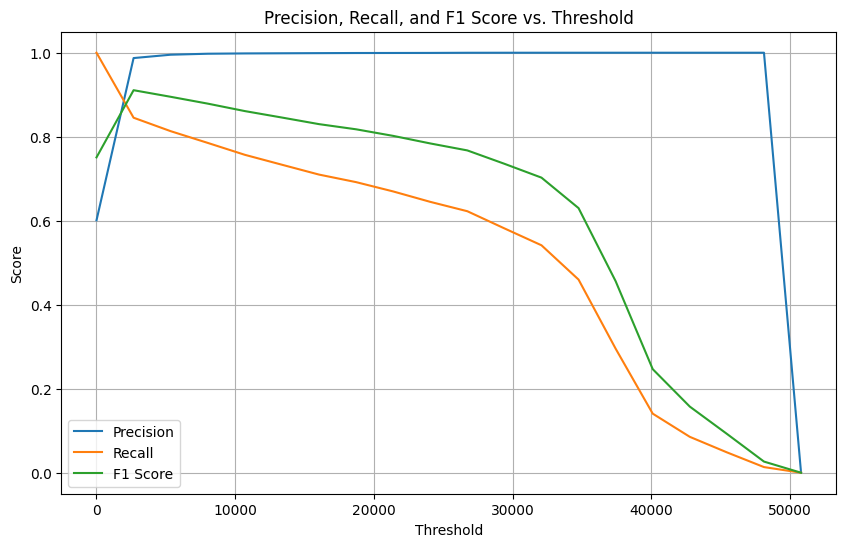

In [ ]:
plot_precision_recall_f1(DARPA_df)

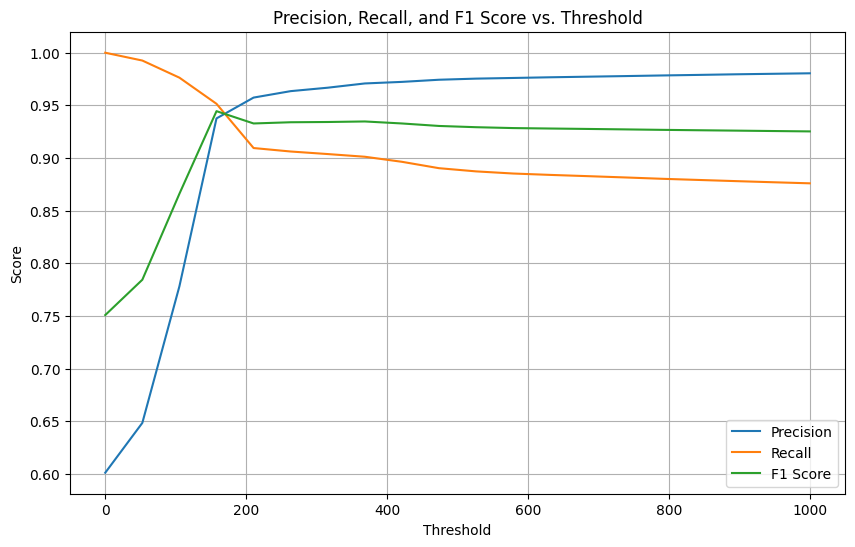

In [ ]:
plot_precision_recall_f1(DARPA_df, start_range=0, end_range=1000)

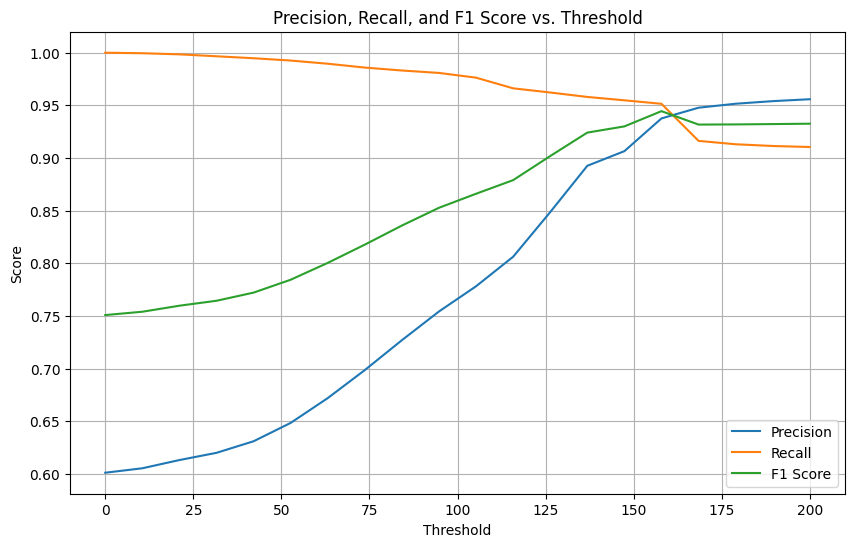

In [ ]:
plot_precision_recall_f1(DARPA_df, start_range=0, end_range=200)

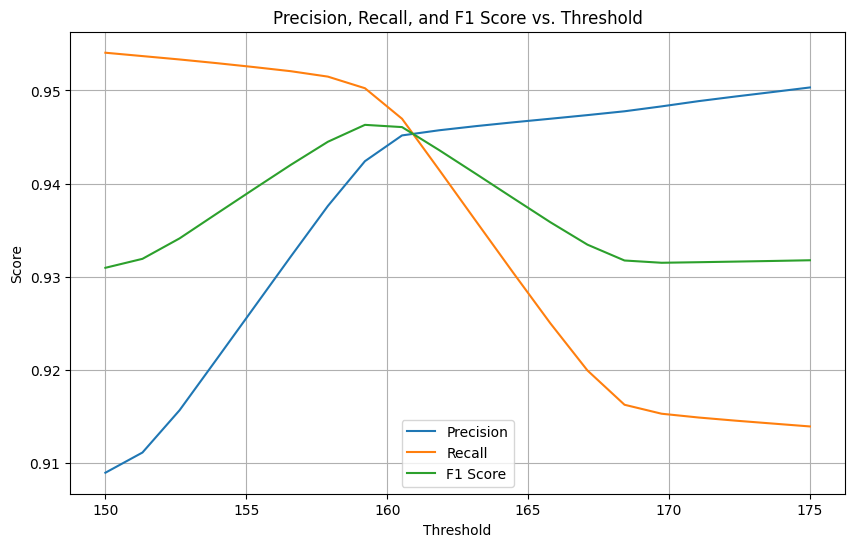

In [ ]:
plot_precision_recall_f1(DARPA_df, start_range=150, end_range=175)

#### ISCX Dataset

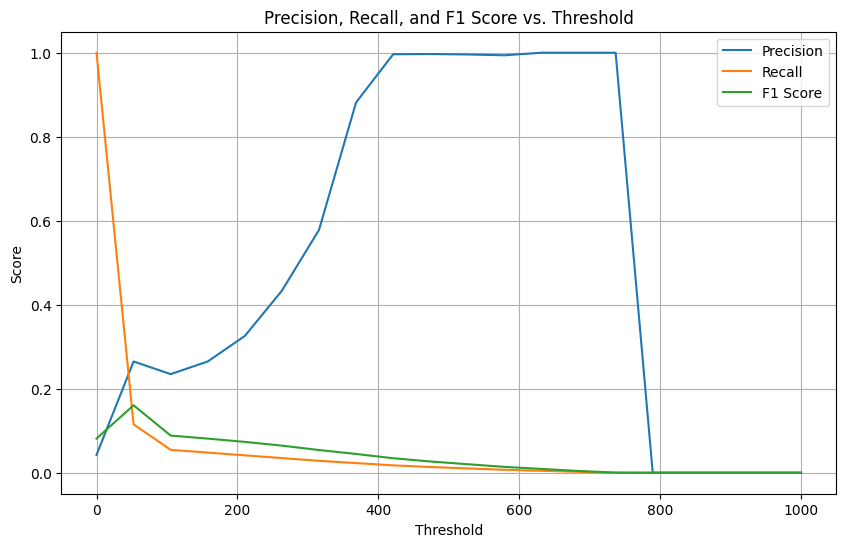

In [ ]:
plot_precision_recall_f1(ISCX_df, start_range=0, end_range=1000)

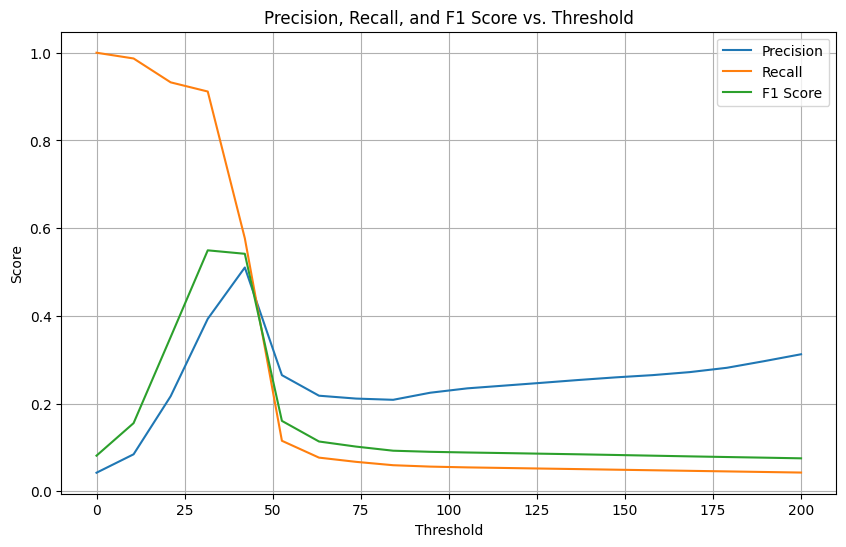

In [ ]:
plot_precision_recall_f1(ISCX_df, start_range=0, end_range=200)

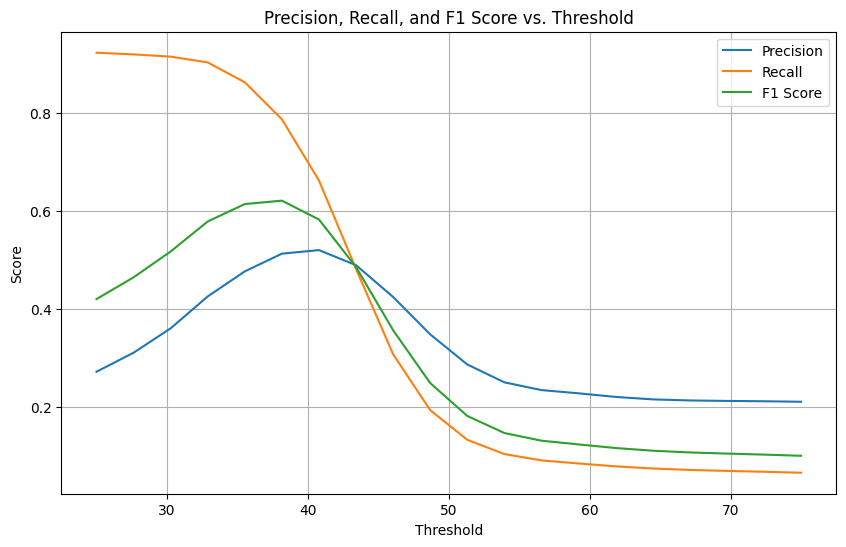

In [ ]:
plot_precision_recall_f1(ISCX_df, start_range=25, end_range=75)

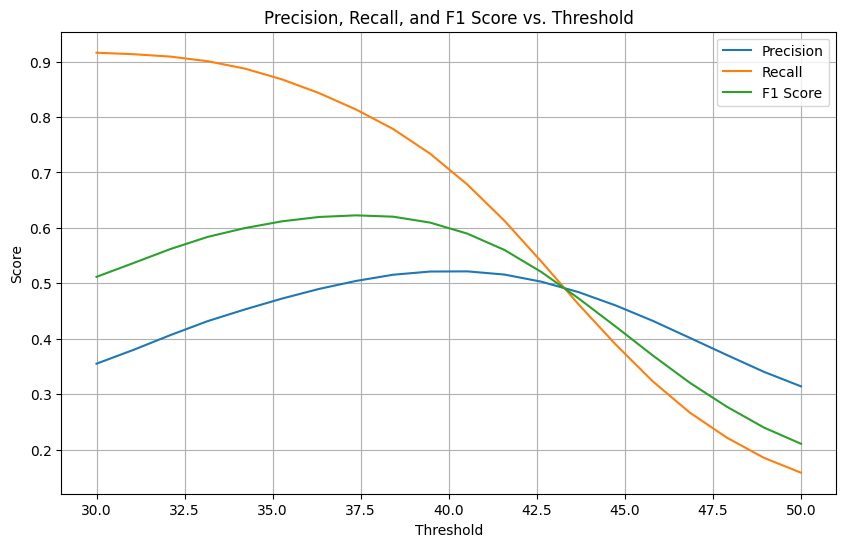

In [ ]:
plot_precision_recall_f1(ISCX_df, start_range=30, end_range=50)

#### IDS 2018

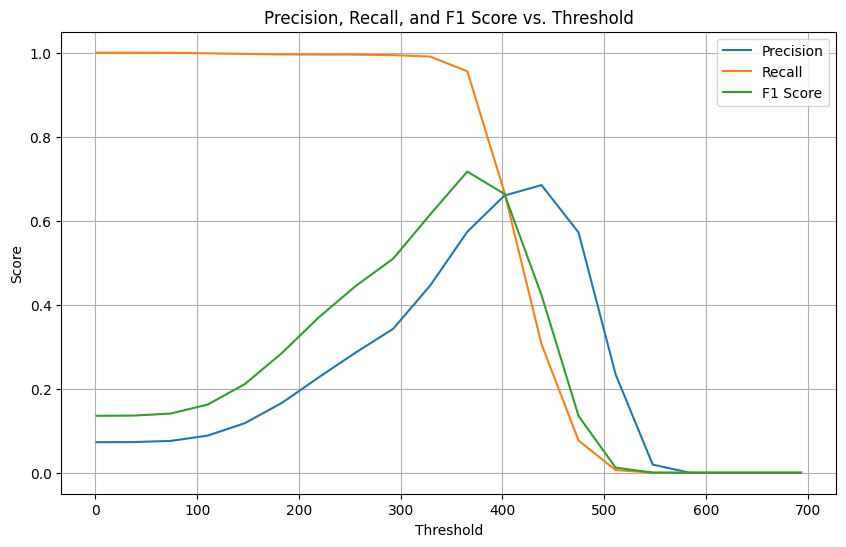

In [ ]:
plot_precision_recall_f1(IDS2018_df)

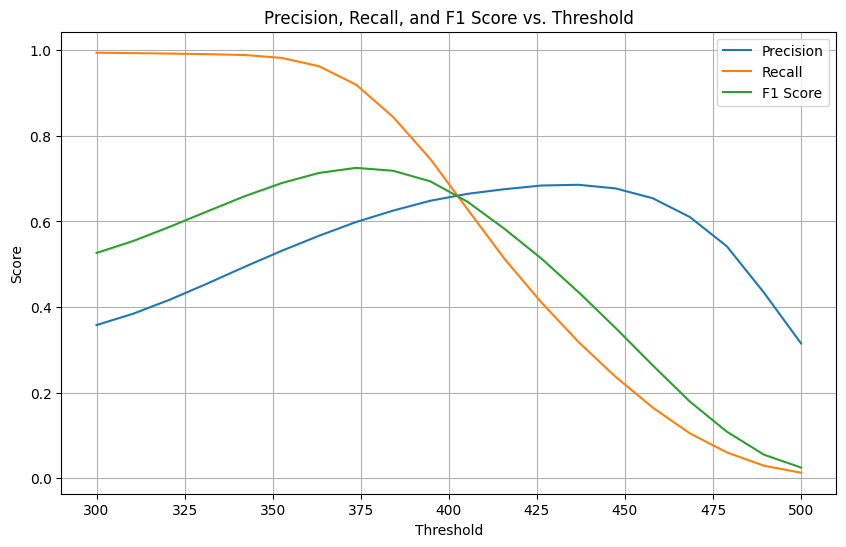

In [ ]:
plot_precision_recall_f1(IDS2018_df, start_range=300, end_range=500)

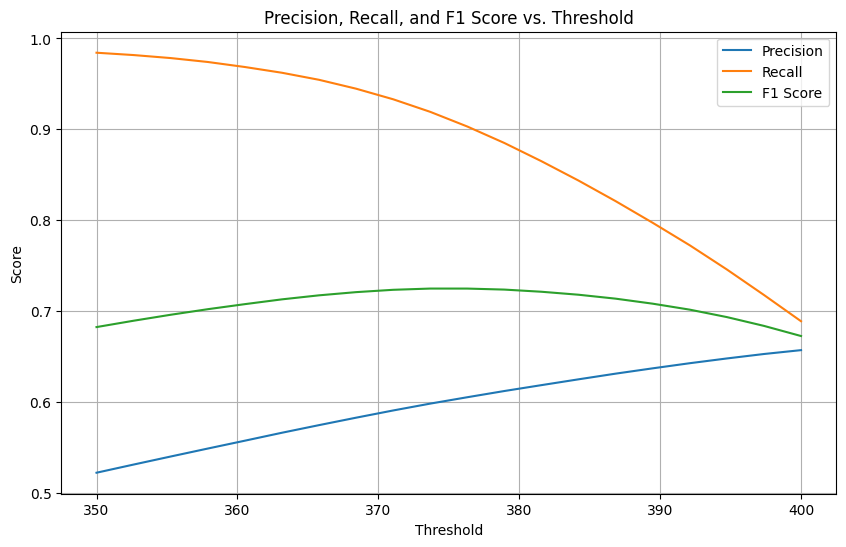

In [ ]:
plot_precision_recall_f1(IDS2018_df, start_range=350, end_range=400)

#### DDOS 2019

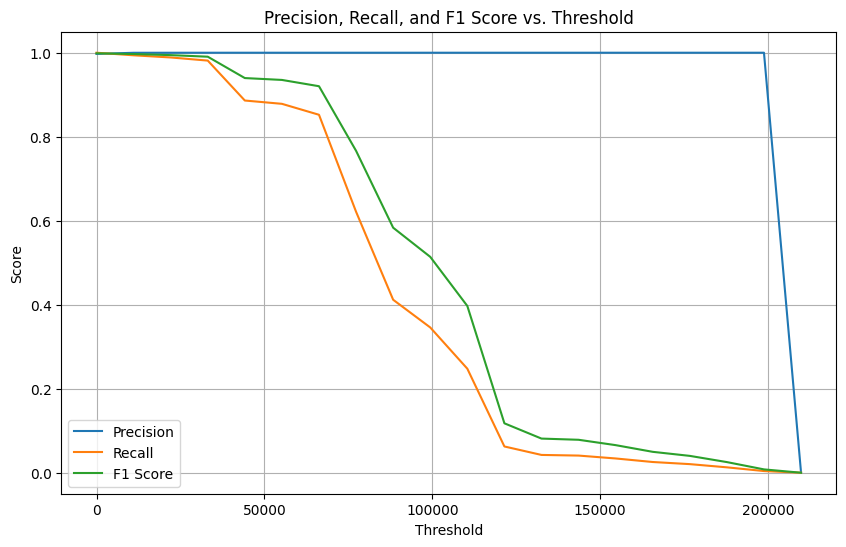

In [ ]:
plot_precision_recall_f1(DDOS2019_df)

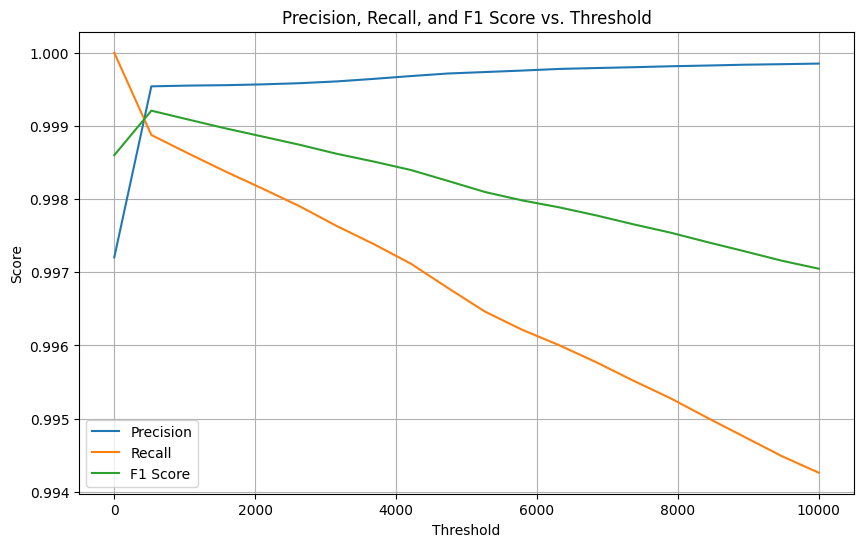

In [ ]:
plot_precision_recall_f1(DDOS2019_df, start_range=0, end_range=10000)

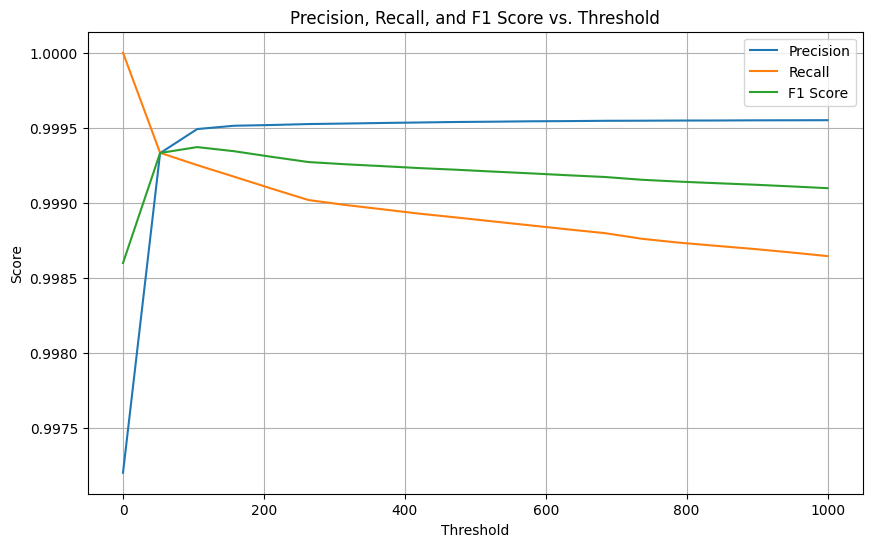

In [ ]:
plot_precision_recall_f1(DDOS2019_df, start_range=0, end_range=1000)

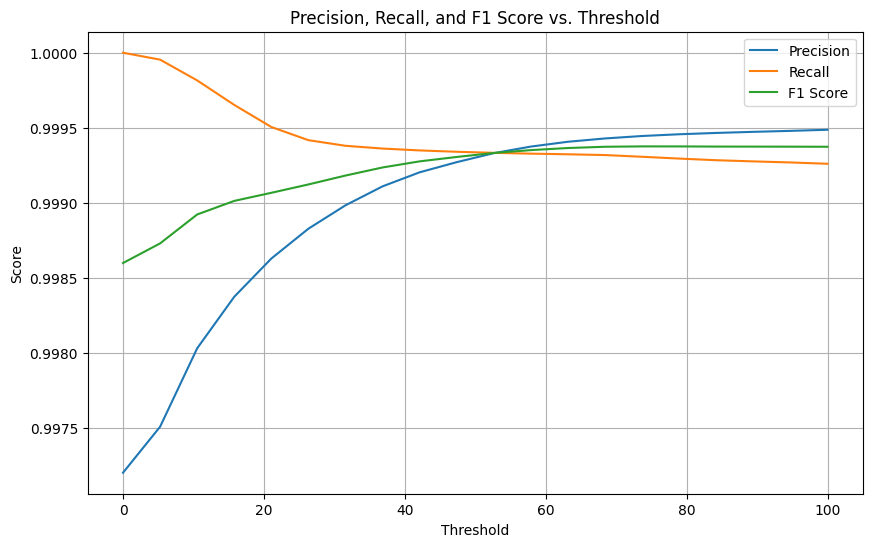

In [ ]:
plot_precision_recall_f1(DDOS2019_df, start_range=0, end_range=100)

## Dynamic analysis

### Exponentialy weighted moving average

In [ ]:
# prompt: Write a code that defines a function
# the function iterates through the values of score column (get the column name and data frame inside args) so here
# You can calculate EWMA based on some constant parameters that can be filled from function argument
# After calculating the EWMA I want to assume as threshold and decide whether the next data is anomaly or no
# after that calculate the F1 , Precission and recall based on this process of threshold

def ewma_anomaly_detection(df, score_column='score', label_column='label', alpha=0.5, threshold_multiplier=1.0):
    """
    Performs anomaly detection using Exponentially Weighted Moving Average (EWMA)
    and calculates evaluation metrics.

    Args:
        df (pd.DataFrame): The input dataframe.
        score_column (str): The name of the column containing anomaly scores.
        label_column (str): The name of the column containing true labels (0 or 1).
        alpha (float): The smoothing factor for EWMA (between 0 and 1).
        threshold_multiplier (float): A multiplier for the EWMA to determine the anomaly threshold.

    Returns:
        tuple: A tuple containing F1 score, Precision, and Recall.
    """
    if score_column not in df.columns:
        raise ValueError(f"Score column '{score_column}' not found in the DataFrame.")
    if label_column not in df.columns:
        raise ValueError(f"Label column '{label_column}' not found in the DataFrame.")

    scores = df[score_column].values
    true_labels = df[label_column].values
    n = len(scores)

    # Calculate EWMA
    ewma = np.zeros(n)
    if n > 0:
        ewma[0] = scores[0]
        for i in range(1, n):
            ewma[i] = alpha * scores[i] + (1 - alpha) * ewma[i-1]

    # Determine predicted labels based on EWMA threshold
    predicted_labels = (scores > ewma * threshold_multiplier).astype(int)

    # Calculate evaluation metrics
    f1 = f1_score(true_labels, predicted_labels, zero_division=0)
    precision = precision_score(true_labels, predicted_labels, zero_division=0)
    recall = recall_score(true_labels, predicted_labels, zero_division=0)

    return f1, precision, recall

In [ ]:
# Example Usage:
f1_darpa, precision_darpa, recall_darpa = ewma_anomaly_detection(DARPA_df)
print(f"DARPA EWMA - F1: {f1_darpa}, Precision: {precision_darpa}, Recall: {recall_darpa}")

DARPA EWMA - F1: 0.788285932327937, Precision: 0.6610133812232459, Recall: 0.9762557407929026


In [ ]:
# prompt: Define a python function and define every thing possible argument with good default values
# Now I want you to write a code that changes and gets the range of  alpha and threshold multiplier
# you have this constants in the first of code
# start_alpha , end_alpha , steps_alpha
# (Linear division between min and max)
# and define good default values
# and also like the mentioned in threshold_multiplier
# so here I can change these values when I wanted
# after that calculate f1 for every possible state and draw a 2d color space using matplotlib so I can view colorbar in two dimentional space

def explore_ewma_parameters(df, score_column='score', label_column='label',
                            start_alpha=0.1, end_alpha=1.0, steps_alpha=10,
                            start_multiplier=0.1, end_multiplier=5.0, steps_multiplier=20):
    """
    Explores different combinations of alpha and threshold_multiplier for EWMA
    anomaly detection, calculates F1 scores, and visualizes the results.

    Args:
        df (pd.DataFrame): The input dataframe.
        score_column (str): The name of the column containing anomaly scores.
        label_column (str): The name of the column containing true labels (0 or 1).
        start_alpha (float): The starting value for alpha.
        end_alpha (float): The ending value for alpha.
        steps_alpha (int): The number of steps for alpha.
        start_multiplier (float): The starting value for the threshold multiplier.
        end_multiplier (float): The ending value for the threshold multiplier.
        steps_multiplier (int): The number of steps for the threshold multiplier.
    """
    alpha_values = np.linspace(start_alpha, end_alpha, steps_alpha)
    multiplier_values = np.linspace(start_multiplier, end_multiplier, steps_multiplier)

    f1_scores_grid = np.zeros((steps_alpha, steps_multiplier))

    for i, alpha in enumerate(alpha_values):
        for j, multiplier in enumerate(multiplier_values):
            f1, _, _ = ewma_anomaly_detection(df, score_column, label_column, alpha=alpha, threshold_multiplier=multiplier)
            f1_scores_grid[i, j] = f1

    # Plotting the results
    plt.figure(figsize=(10, 8))
    im = plt.imshow(
        f1_scores_grid,
        aspect='auto',
        origin='lower',
        extent=[start_multiplier, end_multiplier, start_alpha, end_alpha],
        cmap='viridis'
    )

    # Add F1 score values in each cell
    num_alphas, num_multipliers = f1_scores_grid.shape
    alpha_values = np.linspace(start_alpha, end_alpha, num_alphas)
    multiplier_values = np.linspace(start_multiplier, end_multiplier, num_multipliers)

    for i, alpha in enumerate(alpha_values):
        for j, multiplier in enumerate(multiplier_values):
            score = f1_scores_grid[i, j]
            plt.text(
                multiplier, alpha, f'{score:.2f}',
                ha='center', va='center', color='white' if score < f1_scores_grid.max() * 0.6 else 'black',
                fontsize=8
            )

    # Define tick positions for the colorbar
    cbar_ticks = np.linspace(f1_scores_grid.min(), f1_scores_grid.max(), 5)
    cbar = plt.colorbar(im, label='F1 Score', ticks=cbar_ticks)
    cbar.ax.set_yticklabels([f'{tick:.2f}' for tick in cbar_ticks])

    plt.xlabel('Threshold Multiplier')
    plt.ylabel('Alpha')
    plt.title('F1 Score for different Alpha and Threshold Multiplier values (EWMA)')
    plt.show()


#### DARPA

Exploring EWMA parameters for DARPA_df:


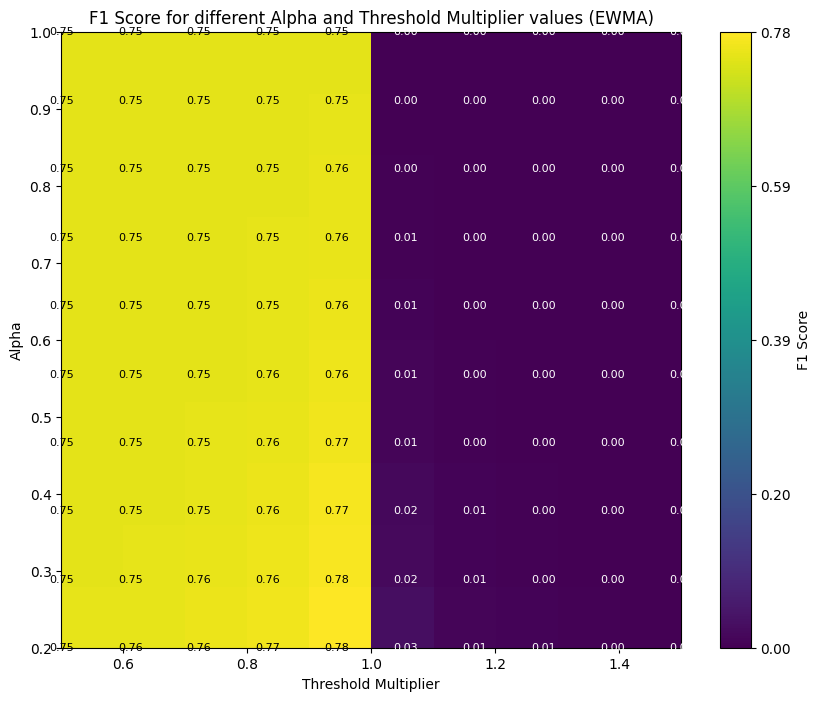

In [ ]:
# Define the range and steps for alpha and threshold_multiplier
start_alpha = 0.2  #@param {type:"number"}
end_alpha = 1  #@param {type:"number"}
steps_alpha = 10  #@param {type:"integer"}

start_multiplier = 0.5  #@param {type:"number"}
end_multiplier = 1.5  #@param {type:"number"}
steps_multiplier = 10  #@param {type:"integer"}

# Example Usage with a dataset (e.g., DARPA_df)
print("Exploring EWMA parameters for DARPA_df:")
explore_ewma_parameters(DARPA_df,
                        start_alpha=start_alpha, end_alpha=end_alpha, steps_alpha=steps_alpha,
                        start_multiplier=start_multiplier, end_multiplier=end_multiplier, steps_multiplier=steps_multiplier)

Exploring EWMA parameters for DARPA_df:


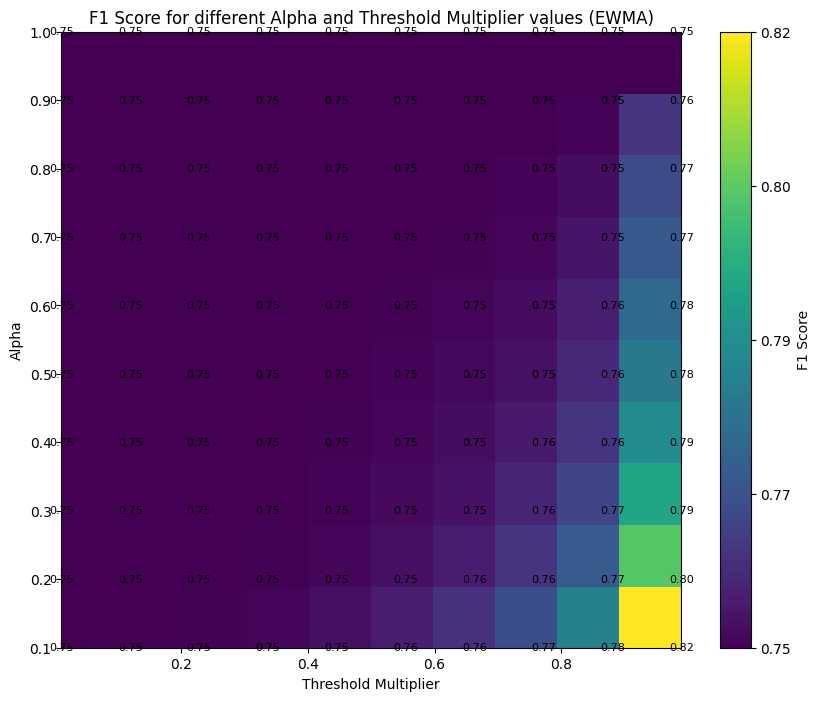

In [ ]:
# Define the range and steps for alpha and threshold_multiplier
start_alpha = 0.1  #@param {type:"number"}
end_alpha = 1  #@param {type:"number"}
steps_alpha = 10  #@param {type:"integer"}

start_multiplier = 0.01  #@param {type:"number"}
end_multiplier = 0.99  #@param {type:"number"}
steps_multiplier = 10  #@param {type:"integer"}

# Example Usage with a dataset (e.g., DARPA_df)
print("Exploring EWMA parameters for DARPA_df:")
explore_ewma_parameters(DARPA_df,
                        start_alpha=start_alpha, end_alpha=end_alpha, steps_alpha=steps_alpha,
                        start_multiplier=start_multiplier, end_multiplier=end_multiplier, steps_multiplier=steps_multiplier)

Exploring EWMA parameters for DARPA_df:


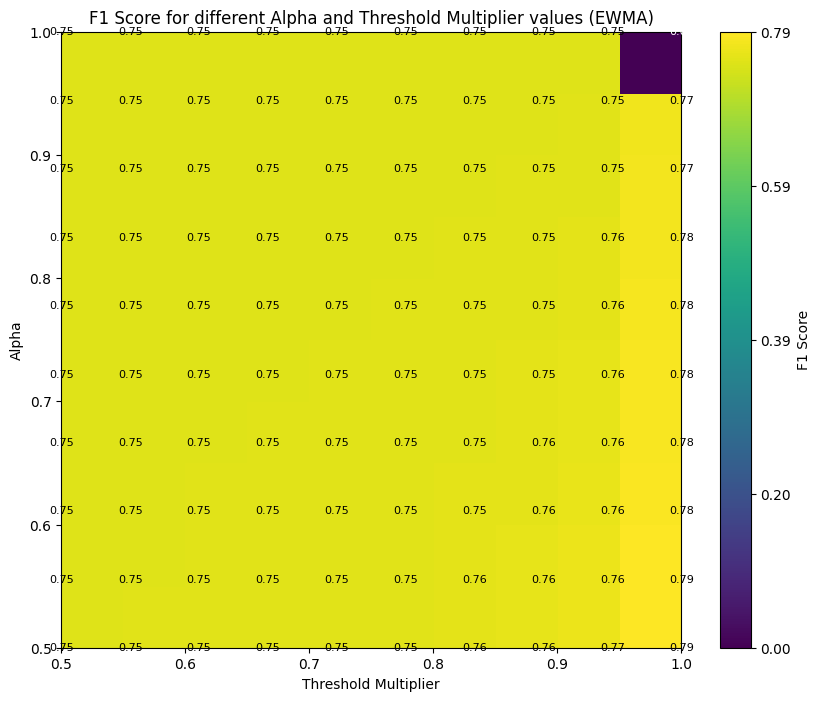

In [ ]:
# Define the range and steps for alpha and threshold_multiplier
start_alpha = 0.5  #@param {type:"number"}
end_alpha = 1  #@param {type:"number"}
steps_alpha = 10  #@param {type:"integer"}

start_multiplier = 0.50  #@param {type:"number"}
end_multiplier = 1  #@param {type:"number"}
steps_multiplier = 10  #@param {type:"integer"}

# Example Usage with a dataset (e.g., DARPA_df)
print("Exploring EWMA parameters for DARPA_df:")
explore_ewma_parameters(DARPA_df,
                        start_alpha=start_alpha, end_alpha=end_alpha, steps_alpha=steps_alpha,
                        start_multiplier=start_multiplier, end_multiplier=end_multiplier, steps_multiplier=steps_multiplier)

#### ISCX

Exploring EWMA parameters for ISCX_df:


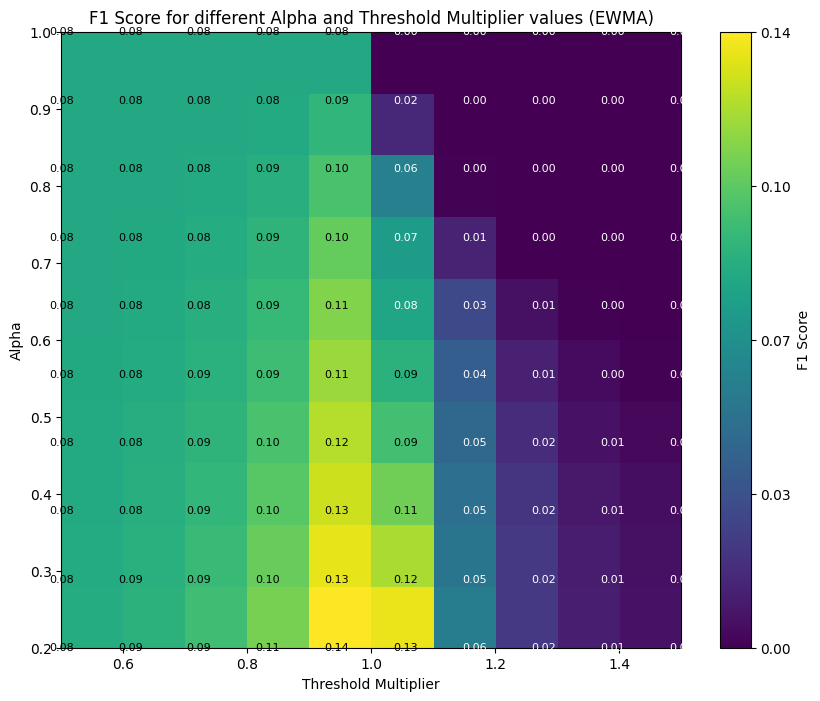

In [ ]:
# Define the range and steps for alpha and threshold_multiplier
start_alpha = 0.2  #@param {type:"number"}
end_alpha = 1  #@param {type:"number"}
steps_alpha = 10  #@param {type:"integer"}

start_multiplier = 0.5  #@param {type:"number"}
end_multiplier = 1.5  #@param {type:"number"}
steps_multiplier = 10  #@param {type:"integer"}

# Example Usage with a dataset (e.g., DARPA_df)
print("Exploring EWMA parameters for ISCX_df:")
explore_ewma_parameters(ISCX_df,
                        start_alpha=start_alpha, end_alpha=end_alpha, steps_alpha=steps_alpha,
                        start_multiplier=start_multiplier, end_multiplier=end_multiplier, steps_multiplier=steps_multiplier)

Exploring EWMA parameters for ISCX_df:


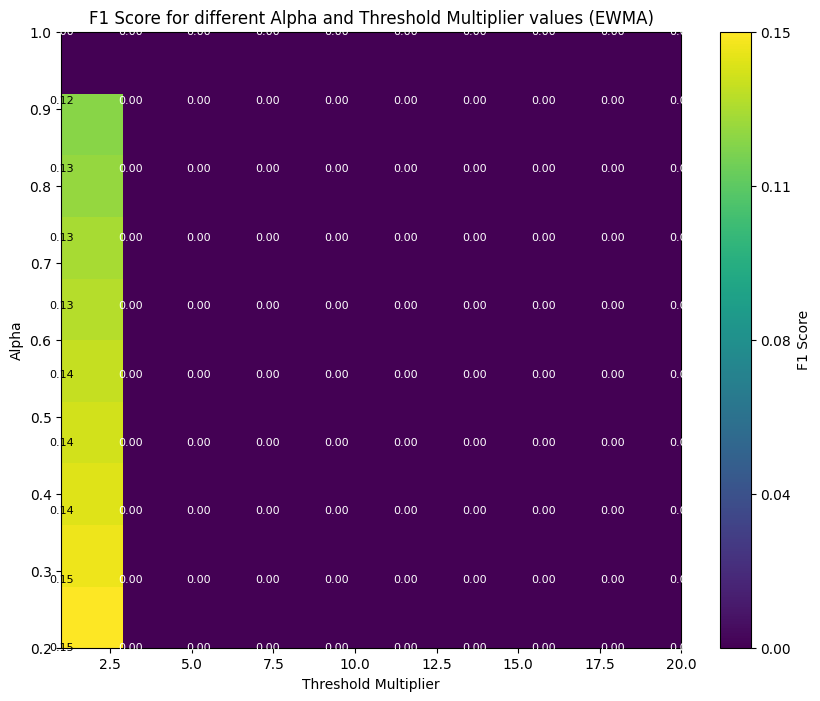

In [ ]:
# Define the range and steps for alpha and threshold_multiplier
start_alpha = 0.2  #@param {type:"number"}
end_alpha = 1  #@param {type:"number"}
steps_alpha = 10  #@param {type:"integer"}

start_multiplier = 1  #@param {type:"number"}
end_multiplier = 20  #@param {type:"number"}
steps_multiplier = 10  #@param {type:"integer"}

# Example Usage with a dataset (e.g., DARPA_df)
print("Exploring EWMA parameters for ISCX_df:")
explore_ewma_parameters(ISCX_df,
                        start_alpha=start_alpha, end_alpha=end_alpha, steps_alpha=steps_alpha,
                        start_multiplier=start_multiplier, end_multiplier=end_multiplier, steps_multiplier=steps_multiplier)

Above diagrams show that this approach not works in this dataset

#### IDS 2018

Exploring EWMA parameters for IDS 2018:


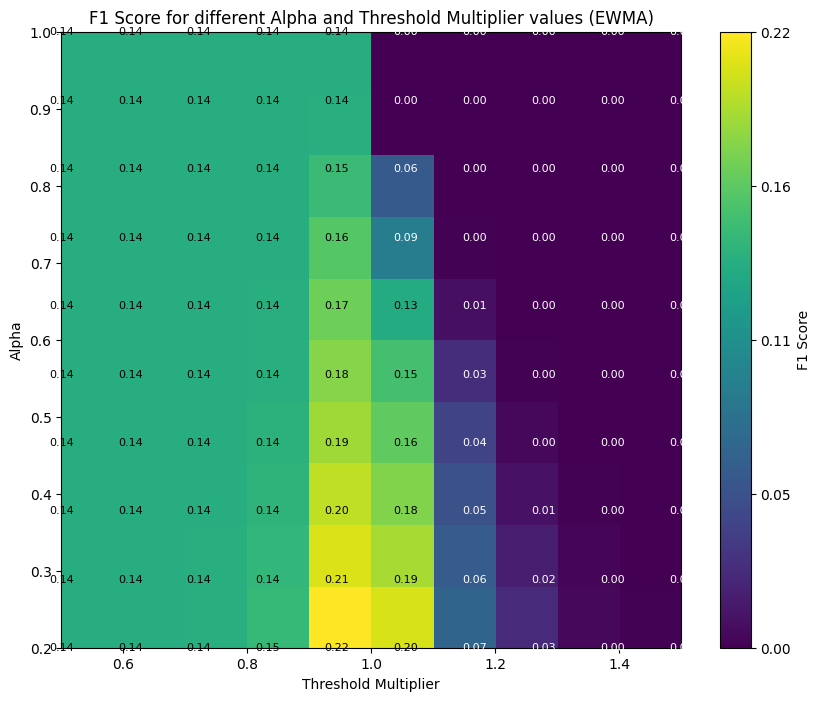

In [ ]:
# Define the range and steps for alpha and threshold_multiplier
start_alpha = 0.2  #@param {type:"number"}
end_alpha = 1  #@param {type:"number"}
steps_alpha = 10  #@param {type:"integer"}

start_multiplier = 0.5  #@param {type:"number"}
end_multiplier = 1.5  #@param {type:"number"}
steps_multiplier = 10  #@param {type:"integer"}

# Example Usage with a dataset (e.g., DARPA_df)
print("Exploring EWMA parameters for IDS 2018:")
explore_ewma_parameters(IDS2018_df,
                        start_alpha=start_alpha, end_alpha=end_alpha, steps_alpha=steps_alpha,
                        start_multiplier=start_multiplier, end_multiplier=end_multiplier, steps_multiplier=steps_multiplier)

#### DDOS 2019

Exploring EWMA parameters for DDOS 2019:


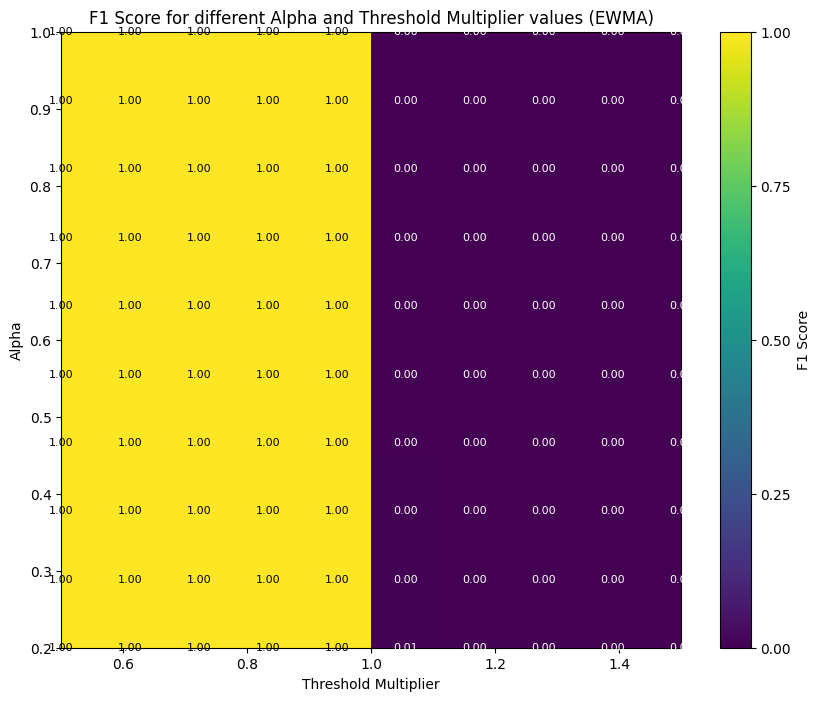

In [75]:
# Define the range and steps for alpha and threshold_multiplier
start_alpha = 0.2  #@param {type:"number"}
end_alpha = 1  #@param {type:"number"}
steps_alpha = 10  #@param {type:"integer"}

start_multiplier = 0.5  #@param {type:"number"}
end_multiplier = 1.5  #@param {type:"number"}
steps_multiplier = 10  #@param {type:"integer"}

# Example Usage with a dataset (e.g., DARPA_df)
print("Exploring EWMA parameters for DDOS 2019:")
explore_ewma_parameters(DDOS2019_df,
                        start_alpha=start_alpha, end_alpha=end_alpha, steps_alpha=steps_alpha,
                        start_multiplier=start_multiplier, end_multiplier=end_multiplier, steps_multiplier=steps_multiplier)